# A gentle introduction to performance

### PHYS 381

## Before we dive in...

[<img src="https://imgs.xkcd.com/comics/is_it_worth_the_time.png">](https://xkcd.com/1205/)

[<img src="https://imgs.xkcd.com/comics/automation.png">](https://xkcd.com/1319/)

[<img src="https://imgs.xkcd.com/comics/efficiency_2x.png">](https://xkcd.com/1445/)

## The code

We're going to look at performance of a shooting code, applied to the quantum harmonic oscillator.

In [1]:
import shooting

shooting.get_energies(shooting.harmonic, 5)

[0.500000003768,
 1.5000000022735187,
 2.5000000104073115,
 3.5000000051911777,
 4.500000001121005]

## First question

How long does it take to run?

### The simple way

In [19]:
import time
starting_time = time.time()
shooting.get_energies(shooting.harmonic, 5)
ending_time = time.time()
time_delta = ending_time - starting_time
time_delta

1.530320405960083

## The better way

In [2]:
%timeit shooting.get_energies(shooting.harmonic, 5)

1 loops, best of 3: 1.25 s per loop


In [3]:
%timeit shooting.get_energies(shooting.harmonic, 10)

1 loops, best of 3: 3.34 s per loop


In [4]:
%timeit shooting.get_energies(shooting.harmonic, 15)

1 loops, best of 3: 6.18 s per loop


In [5]:
%timeit shooting.get_energies(shooting.harmonic, 20)

1 loops, best of 3: 9.68 s per loop


In [20]:
# check overhead
%timeit shooting.get_energies(shooting.harmonic, 0)

100 loops, best of 3: 3.95 ms per loop


In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

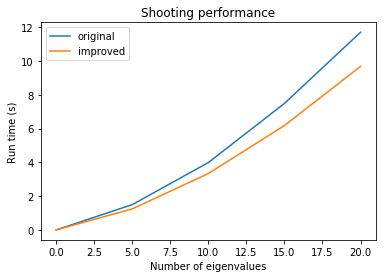

In [8]:
plt.plot([0,5,10,15,20], [3.95e-3, 1.5, 3.99, 7.49, 11.7], label="original")
plt.plot([0,5,10,15,20], [3.95e-3, 1.25, 3.34, 6.18, 9.68], label="improved")
plt.title("Shooting performance")
plt.ylabel("Run time (s)")
plt.xlabel("Number of eigenvalues")
plt.legend()

## Second question:

What is it doing that takes as long as it does?

In [9]:
%prun shooting.get_energies(shooting.harmonic, 5)

In [23]:
%prun shooting.get_energies(shooting.harmonic, 10)

In [25]:
import importlib

In [26]:
help(importlib.reload)

Help on function reload in module importlib:

reload(module)
    Reload the module and return it.
    
    The module must have been successfully imported before.



In [27]:
importlib.reload(shooting)

<module 'shooting' from '/home/cmckay/PHYS381/notebooks/shooting/__init__.py'>

In [28]:
shooting.get_energies(shooting.harmonic, 5)

[0.500000003768,
 1.5000000022735187,
 2.5000000104073115,
 3.5000000051911777,
 4.500000001121005]

In [29]:
%timeit shooting.get_energies(shooting.harmonic, 5)

1 loops, best of 3: 1.53 s per loop
